<a href="https://colab.research.google.com/github/dwonn201/KaggleStudy/blob/master/11_Football_Match_Probability_Prediction/Football_Match_Probability_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Match Probability Prediction
--------------------
#### Predict the probability results of the beautiful game
https://www.kaggle.com/c/football-match-probability-prediction/overview

## Competition Description

경기를 하는 2팀의 가장 최근 폼을 기반으로 경기 결과 예측하기.  
각 팀의 폼은 그들의 가장 최근 경기 결과를 바탕으로 보여질 수 있음.  
그 결과 두 팀간의 경기 결과 확률은 그들의 경기 스케쥴에 따라 달라질 수 있음
## 데이터 소개
(https://www.kaggle.com/c/football-match-probability-prediction/data?select=train.csv)

    - 이번 주제는 축구경기 승/패/무 확률 예측입니다.

    - 다음 3개의 csv 파일을 사용합니다.
    train.csv
    test.csv
    sample_submission.csv
    
    - 각 파일의 컬럼 크게 3가지 파트로 구분되며, 내용은 아래와 같습니다.
    

**Descriptive columns**

    'target'- home/away/draw 3가지 값을 가지고 있음. train set에서만 사용 가능
    'home_team_name'- 홈팀명.
    'away_team_name'- 어웨이팀명.
    'match_date'- 경기일 (UTC).
    'league_name'	- 리그명 ex) Premier Leage(영국 프리미어리그), Club Friendlies(친선경기) 등 .
    'league_id'- 리그ID. 
    'is_cup'- 컵대회 여부. 값이 1일 경우 컵대회
    'home_team_coach_id'	- 홈팀 코치ID.
    'away_team_coach_id'	- 어웨이팀 코치ID.

**Historical home team features**

    'home_team_history_match_date_{i}'	- 홈팀 최근 i번째 경기 일자. 
    'home_team_history_is_play_home_{i}'- 홈 경기 여부. 값이 1일 경우 홈팀 홈에서 경기. 
    'home_team_history_is_cup_{i}'- 홈팀 컵대회 경기 여부. 값이 1일 경우 컵대회 경기.
    'home_team_history_goal_{i}'- 최근 i번째 경기에서 득점한 골 수.
    'home_team_history_opponent_goal_ {i}'- 최근 i번째 경기에서 상대팀이 득점한 골 수.
    'home_team_history_rating_{i}'- 최근 i번째 경기 홈팀 rating (경기 전 rating).
    'home_team_history_opponent_rating_{i}'- 최근 i번째 경기에서 상대팀이 홈팀 상대 rating (경기 전 rating).
    'home_team_history_coach_{i}'- 최근 i번째 경기 코치 id
    'home_team_history_league_id_{i}'- 최근 i번째 경기 홈팀 리그 명.

**Historical away team features**  

    'away_team_history_match_date_{i}'- 어웨이팀 최근 i번째 경기 일자. 
    'away_team_history_is_play_home_{i}'- 홈 경기 여부. 값이 1일 경우 어웨이팀 홈에서 경기. 
    'away_team_history_is_cup_{i}'- 어웨이팀 컵대회 경기 여부. 값이 1일 경우 컵대회 경기.
    'away_team_history_goal_{i}'- 어웨이팀 최근 i번째 경기에서 득점한 골 수.
    'away_team_history_opponentgoal{i}'- 어웨이팀 최근 i번째 경기에서 상대팀이 득점한 골 수.
    'away_team_history_rating_{i}'- 어웨이팀 최근 i번째 경기 rating (경기 전 rating).
    'away_team_history_opponent_rating{i}'- 어웨이팀 최근 i번째 경기에서 상대팀 rating (경기 전 rating).
    'away_team_historycoach{i}'- 어웨이팀 최근 i번째 경기 코치 id
    'away_team_history_league_id_{i}'- 어웨이팀 최근 i번째 경기 리그 명.


#### What are the rating features?
* rating 변수들은 [Octosport](https://www.octosport.io/)라는 곳에서 계산된 점수입니다. Rating이란 해당 경기에서 팀이 가진 상대적 강점에 대한 정보를 제공합니다.  
* 예를 들어, 한 팀의 rating이 10.5 이고, 다른 팀의 rating이 2.5 라면, 10.5의 팀이 2.5의 팀을 이기기를 기대합니다.


## Step 1. 데이터셋 준비하기

### 1. Colab Notebook에 Kaggle API 세팅


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('max_rows', 200)

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = '' 


### 2. 데이터 다운로드 및 압축 해제

In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 및 압축 해제
!rm *.*
!kaggle competitions download -c football-match-probability-prediction
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
 76% 30.0M/39.5M [00:00<00:00, 78.7MB/s]
100% 39.5M/39.5M [00:00<00:00, 105MB/s] 
  0% 0.00/246k [00:00<?, ?B/s]
100% 246k/246k [00:00<00:00, 96.3MB/s]
 65% 17.0M/26.3M [00:01<00:01, 5.07MB/s]
100% 26.3M/26.3M [00:01<00:00, 17.0MB/s]
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  train.csv.zip
  inflating: train.csv               

3 archives were successfully processed.


### 3. data 불러오기


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(train.shape)
train.head()

(110938, 190)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,2019-11-03 18:30:00,2019-10-29 22:10:00,2019-10-19 20:45:00,2019-10-04 22:00:00,2019-09-28 23:00:00,2019-09-22 14:00:00,2019-09-15 18:30:00,2019-09-01 16:15:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.598000,11.825567,9.374867,8.265660,10.769583,4.680350,6.429871,12.773025,10.970814,5.924407,5.253225,2.819962,3.114820,3.283603,2.574183,5.887331,4.570225,2.843268,3.057739,4.684664,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,468200.0,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,2019-11-10 01:00:00,2019-11-02 21:30:00,2019-10-27 01:00:00,2019-10-24 01:00:00,2019-10-21 00:00:00,2019-10-18 01:00:00,2019-10-06 01:00:00,2019-09-29 21:00:00,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.000588,4.692008,4.461575,5.301500,8.290211,5.260700,4.928100,5.708921,4.125842,4.103719,6.881762,6.840558,8.700363,5.156150,3.864878,6.237028,6.871904,5.716200,7.960465,9.994456,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,22169161.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,2019-11-03 21:30:00,2019-10-27 01:00:00,2019-10-20 22:00:00,2019-10-17 01:00:00,2019-10-05 21:00:00,2019-09-29 01:00:00,2019-09-22 22:00:00,2019-09-19 01:00:00,

In [7]:
print(test.shape)
test.head()

(72711, 189)


,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,12 de Octubre,Sportivo Luqueño,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,2021-04-23 23:00:00,2021-04-21 00:30:00,2021-04-17 00:15:00,2021-04-11 00:30:00,2021-04-06 22:15:00,2021-04-01 22:15:00,2021-03-20 22:00:00,2021-03-16 22:15:00,2021-03-13 21:30:00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6.038947,4.514535,4.437450,4.589986,3.701850,4.521075,4.972890,3.150812,7.084988,5.106171,4.721590,6.953965,6.535228,5.782611,7.538950,8.428800,4.922229,6.796484,3.809293,6.721784,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,30866250.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,Necaxa,Atlas,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,2021-04-17 00:30:00,2021-04-10 00:30:00,2021-04-04 01:00:00,2021-03-20 01:00:00,2021-03-16 03:00:00,2021-03-08 01:06:00,2021-03-05 01:00:00,2021-02-27 01:30:00,2021-02-20 01:30:00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.603333,5.947966,6.384433,6.715850,4.679800,5.040744,6.765418,6.203948,4.995129,5.517792,4.459100,4.543053,4.861583,5.082300,9.011000,6.621075,4.141575,5.056690,6.625557,5.895073,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,460370.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,Sertãozinho,EC São Bernardo,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,2021-04-24 23:00:00,2021-04-22 23:00:00,2021-04-21 01:00:00,2021-03-14 18:00:00,2021-03-10 18:00:00,2021-03-07 13:00:00,2021-02-28 13:00:00,2020-08-30 14:00:00,2020-08-26 18:00:00,1.0,0.0,1.

In [8]:
train.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,...,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,away_team_history_coach_1,away_team_history_coach_2,away_team_history_coach_3,away_team_history_coach_4,away_team_history_coach_5,away_team_history_coach_6,away_team_history_coach_7,away_team_history_coach_8,away_team_history_coach_9,away_team_history_coach_10,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.109380e+05,110938.000000,8.921700e+04,8.912300e+04,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,101643.000000,100219.000000,98802.000000,97379.000000,109725.000000,108381.000000,107025.000000,105639.000000,104190.000000,102707.000000,101218.000000,99675.000000,98208.000000,96752.000000,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,101643.000000,100219.000000,98802.000000,97379.000000,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,...,109699.000000,108335.000000,106891.000000,105413.000000,103922.000000,102501.000000,101060.000000,99635.000000,98166.000000,96715.000000,109699.000000,108335.000000,106891.000000,105413.000000,103922.000000,102501.000000,101060.000000,99635.000000,98166.000000,96715.000000,8.929700e+04,8.924200e+04,8.898900e+04,8.864400e+04,8.808300e+04,8.741300e+04,8.656100e+04,8.571900e+04,8.478800e+04,8.380900e+04,109712.000000,108345.000000,106904.000000,105422.000000,103938.000000,102512.000000,101071.000000,99643.000000,98176.000000,96722.000000
mean,1.519875e+07,910.457012,1.287134e+07,1.291552e+07,0.306944,0.567801,0.466141,0.519469,0.487857,0.507288,0.497624,0.502060,0.500962,0.498958,0.083199,0.083742,0.083205,0.084240,0.084883,0.084512,0.085202,0.083421,0.085869,0.085900,1.343299,1.409966,1.383353,1.401013,1.398139,1.398556,1.398906,1.401840,1.404972,1.402643,1.423569,1.346908,1.376224,1.356501,1.367209,1.359057,...,6.786555,6.460632,6.590450,6.520199,6.573126,6.536206,6.549392,6.535049,6.530659,6.528311,6.281844,6.604754,6.452470,6.512163,6.451090,6.462982,6.430701,6.418890,6.408248,6.380908,1.300525e+07,1.306729e+07,1.3

In [9]:
# 각 컬럼별 NULL값
train.isna().sum()

id                                          0
target                                      0
home_team_name                              1
away_team_name                              1
match_date                                  0
league_name                                 1
league_id                                   0
is_cup                                      1
home_team_coach_id                      21721
away_team_coach_id                      21815
home_team_history_match_date_1           1159
home_team_history_match_date_2           2451
home_team_history_match_date_3           3773
home_team_history_match_date_4           5101
home_team_history_match_date_5           6477
home_team_history_match_date_6           7896
home_team_history_match_date_7           9295
home_team_history_match_date_8          10719
home_team_history_match_date_9          12136
home_team_history_match_date_10         13559
home_team_history_is_play_home_1         1159
home_team_history_is_play_home_2  

In [10]:
# 각 컬럼별 NULL값 전체 ROW수 대비 비율로 확인
train.isna().sum() / train.shape[0] * 100

id                                       0.000000
target                                   0.000000
home_team_name                           0.000901
away_team_name                           0.000901
match_date                               0.000000
league_name                              0.000901
league_id                                0.000000
is_cup                                   0.000901
home_team_coach_id                      19.579405
away_team_coach_id                      19.664137
home_team_history_match_date_1           1.044728
home_team_history_match_date_2           2.209342
home_team_history_match_date_3           3.400999
home_team_history_match_date_4           4.598064
home_team_history_match_date_5           5.838396
home_team_history_match_date_6           7.117489
home_team_history_match_date_7           8.378554
home_team_history_match_date_8           9.662154
home_team_history_match_date_9          10.939444
home_team_history_match_date_10         12.222142


* 연관된 컬럼들은 null 수가 동일함 ex)home_team_history_match_date & home_team_history_is_play_home -> 한row가 다 null값일 수 있음.
* 코치 관련된 컬럼들은 null값이 약 20%정도 존재
* i번째 컬럼들은 1 -> 10으로 갈수록 비율이 증가함 
ex) away_team_history_opponent_goal_1 -> away_team_history_opponent_goal_10

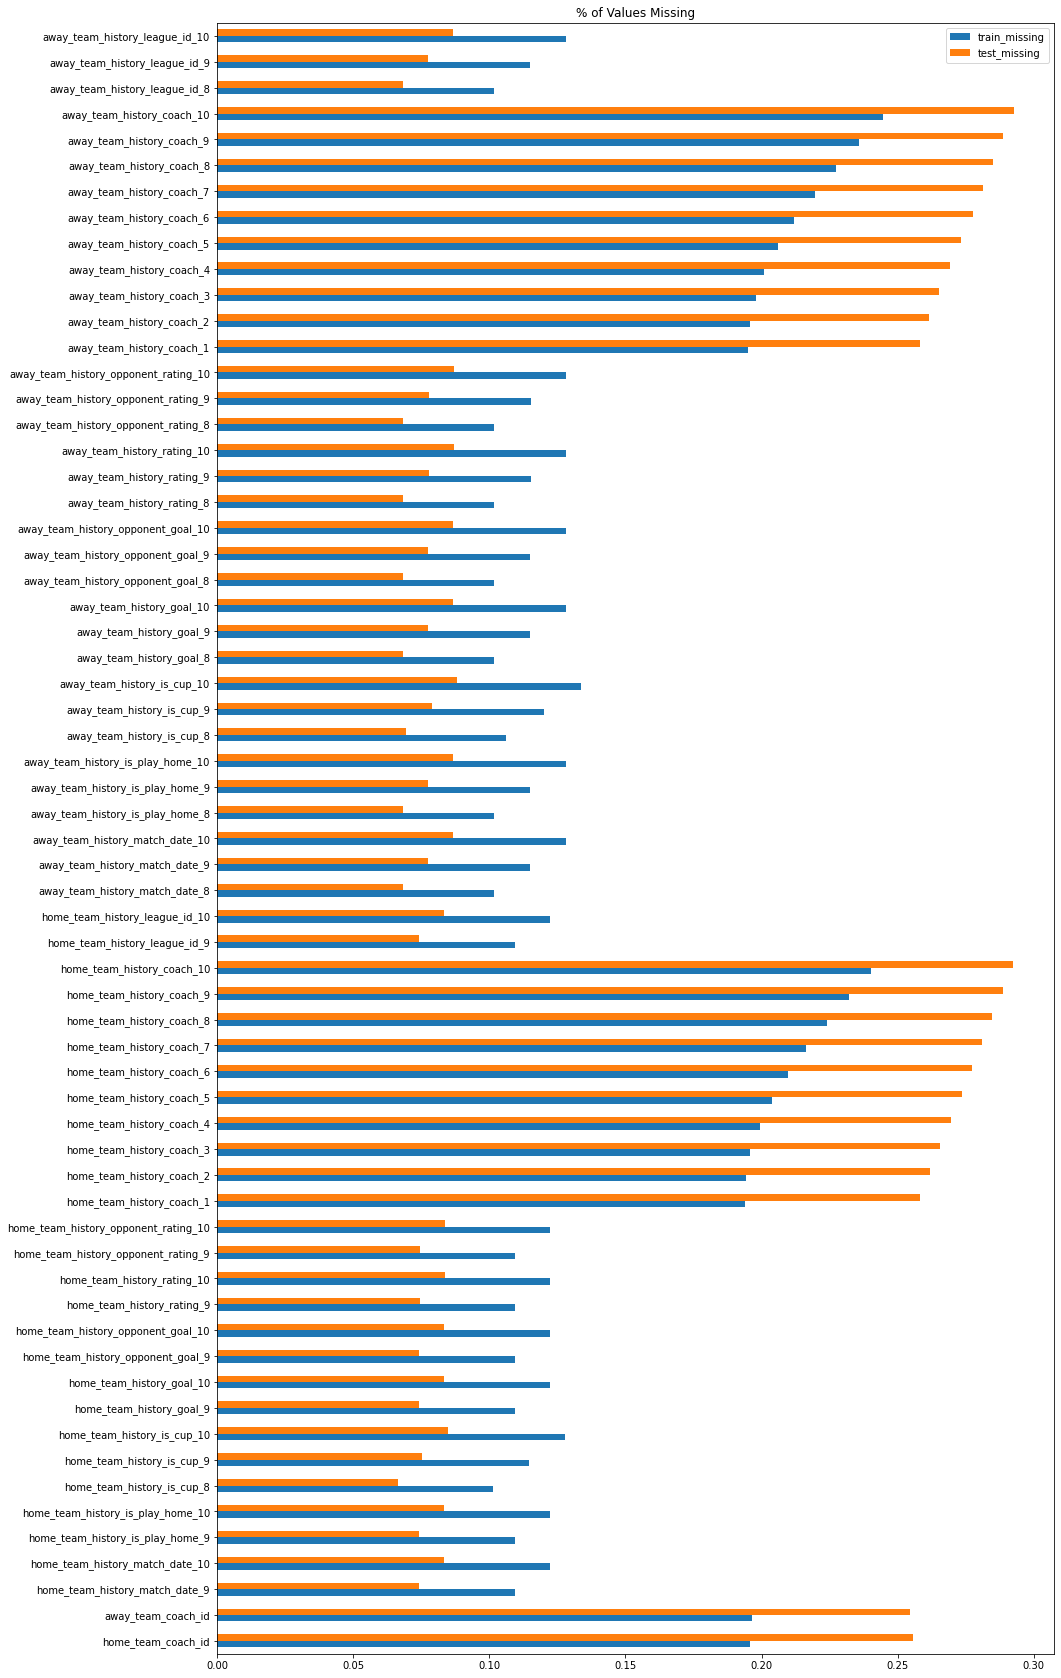

In [11]:
# train과 test set 내 missing value 비율 확인
count_missing = pd.DataFrame([train.isna().mean(),test.isna().mean()]).T
count_missing = count_missing.rename(columns={0: "train_missing", 1: "test_missing"})

# missing value 가 30%를 넘지 않으므로 missing value 가 10~30% 사이인 컬럼들만 그래프화
count_missing.query("train_missing > 0.1 and train_missing < 0.3").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

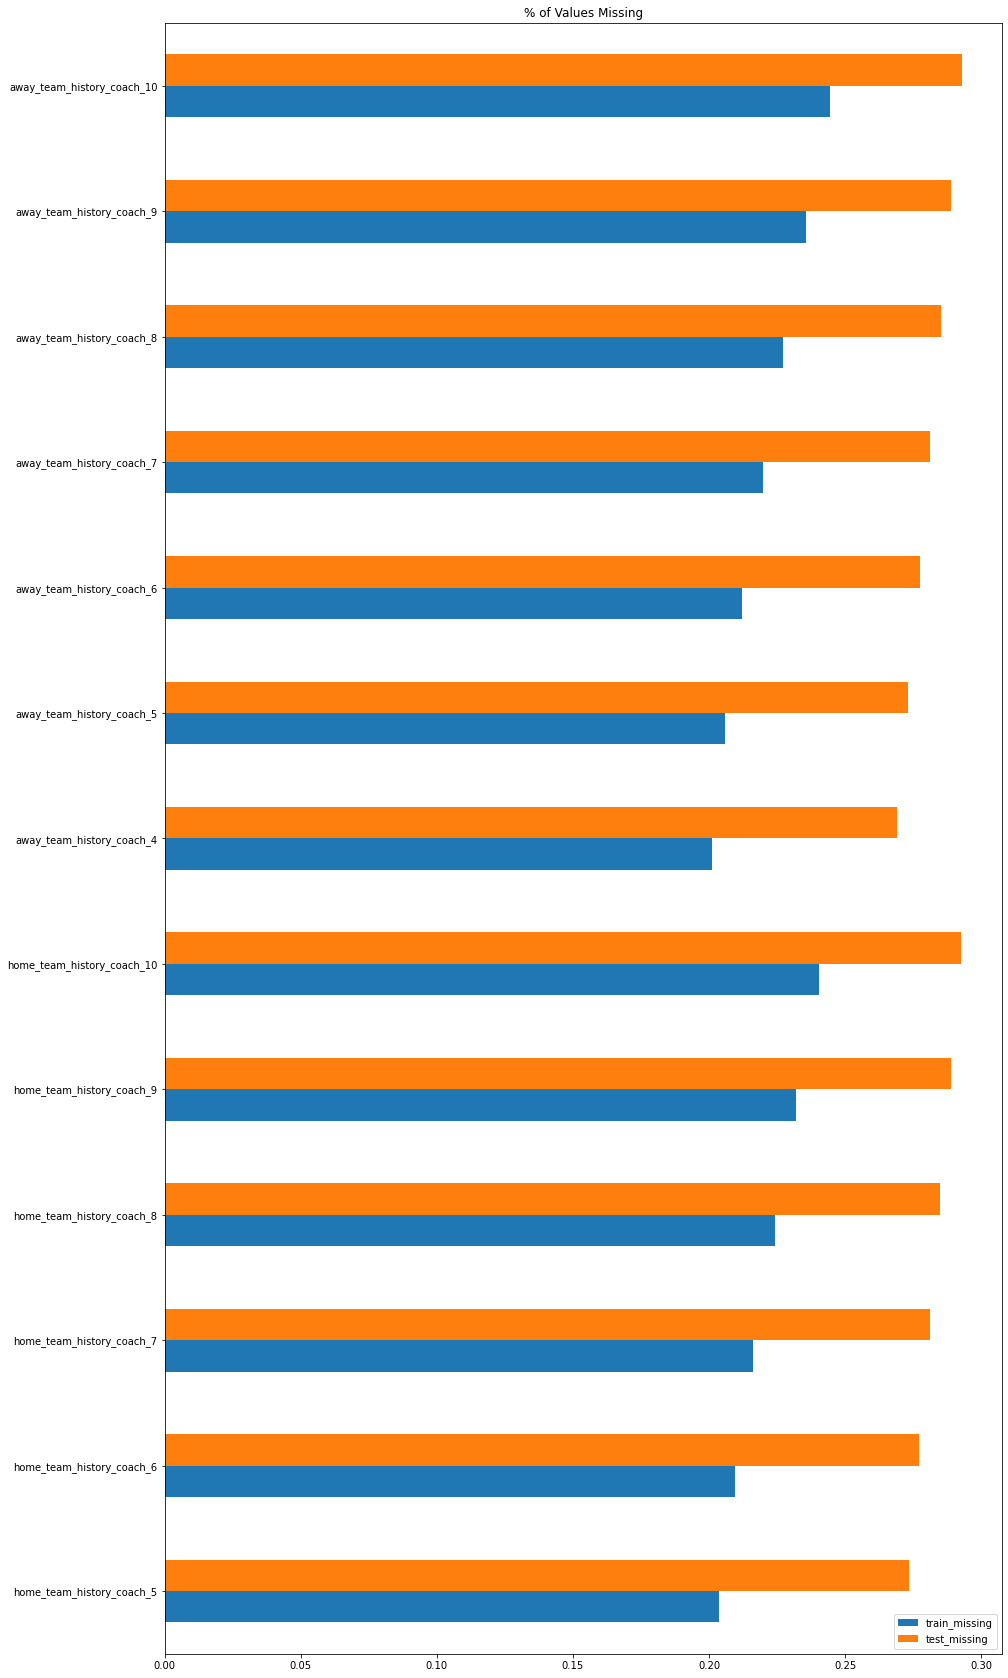

In [12]:
count_missing.query("train_missing > 0.2 and train_missing < 0.3").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

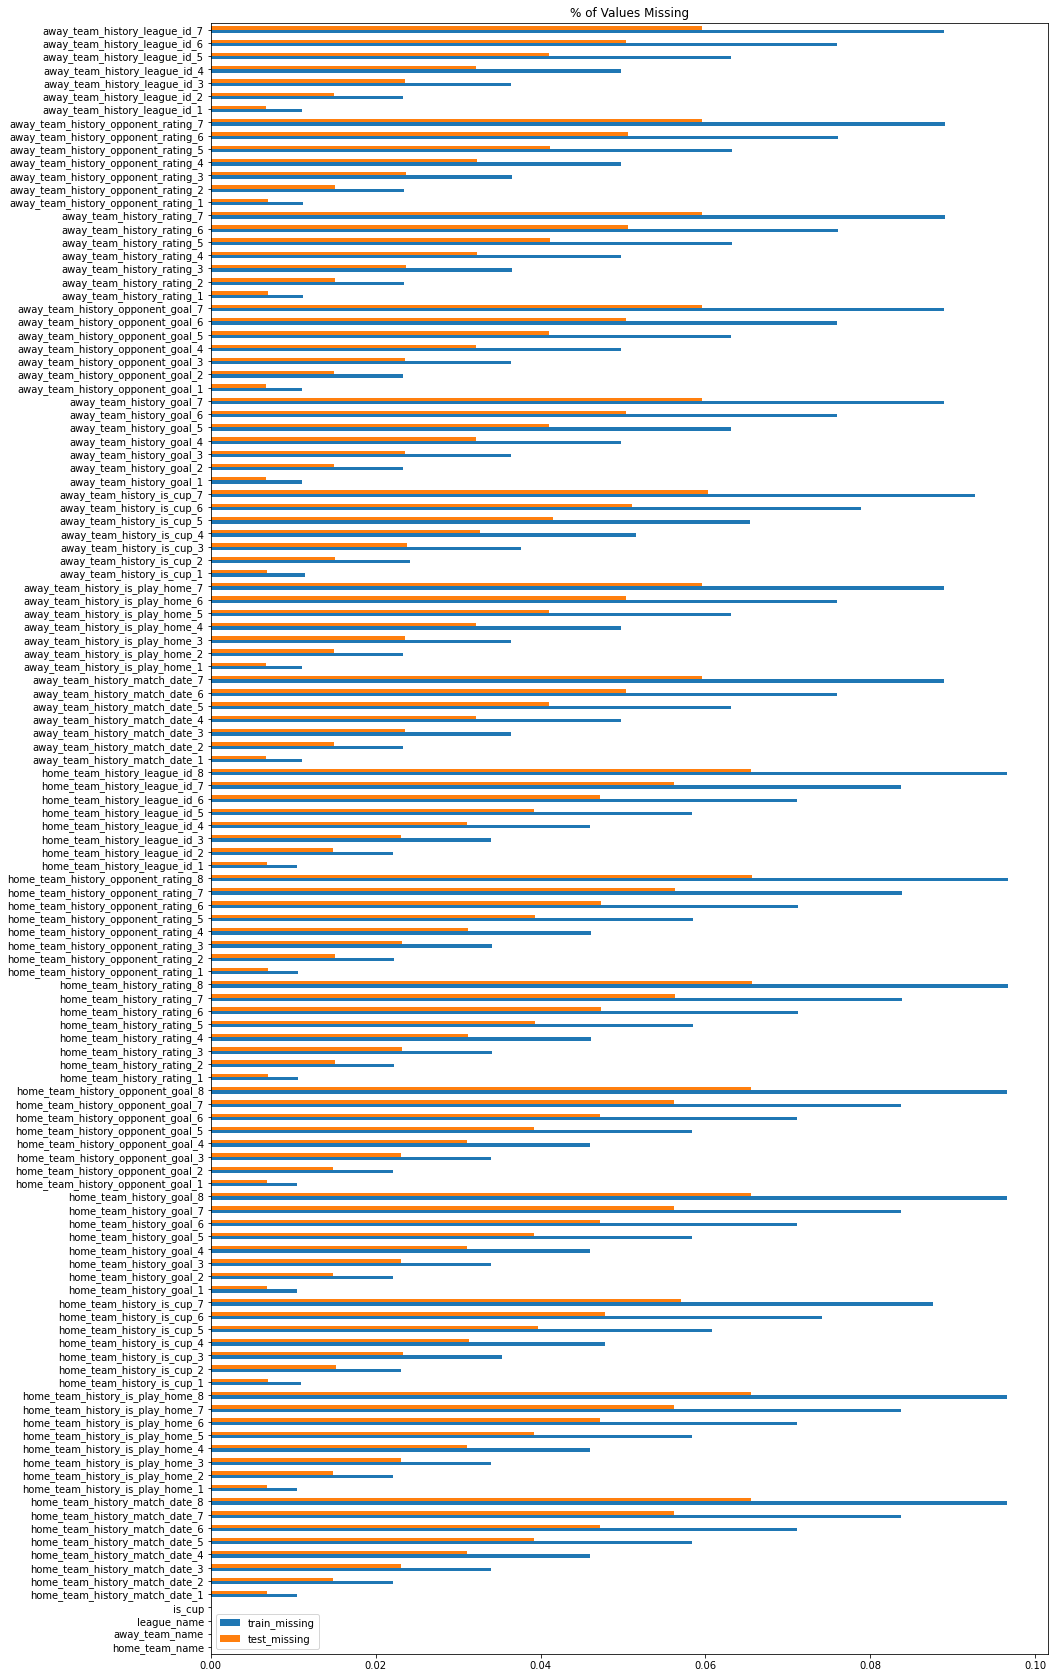

In [13]:
count_missing.query("train_missing > 0 and train_missing < 0.1").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

## Step 2. EDA 및 데이터 기초 통계 분석


### 1. Target

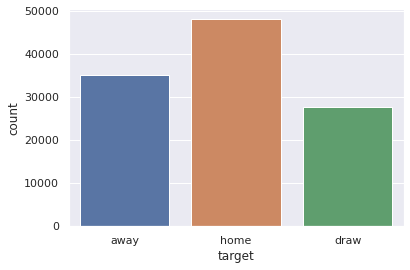

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x="target",data=train)

### 2. home & away name

In [15]:
print(train["home_team_name"].nunique())
train["home_team_name"].value_counts()

9813


Al Ittihad          91
River Plate         71
Rangers             64
Liverpool           63
Al Ahli             62
                    ..
Atlético GO U20      1
Cray Valley (PM)     1
Worcester City       1
Velke Lovce          1
EB / Streymur II     1
Name: home_team_name, Length: 9813, dtype: int64

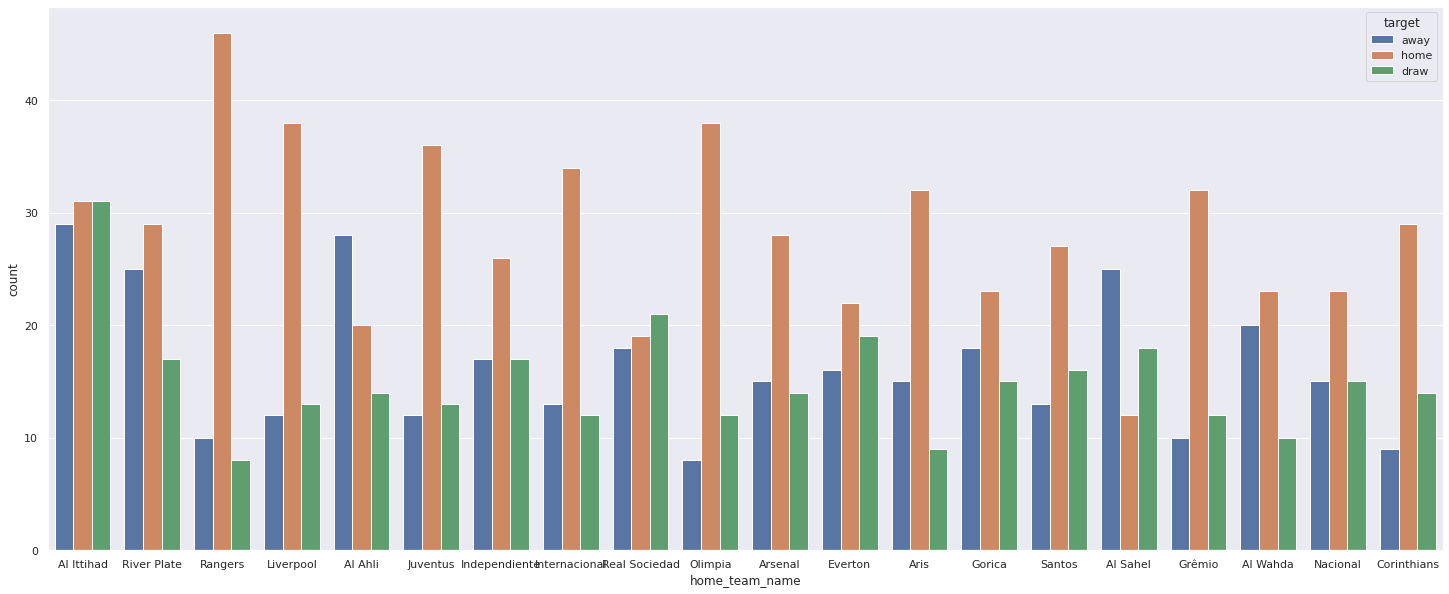

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x="home_team_name",hue="target",data=train,order=train.home_team_name.value_counts().iloc[:20].index)

In [18]:
print(train["away_team_name"].nunique())
train["away_team_name"].value_counts()

9892


Al Ittihad              82
River Plate             77
Liverpool               65
Rangers                 64
Al Ahli                 64
                        ..
Hlinsko                  1
Tatran Rakovnik          1
Makedonikos Foufas       1
Hohenstein-Ernstthal     1
Úlfarnir                 1
Name: away_team_name, Length: 9892, dtype: int64

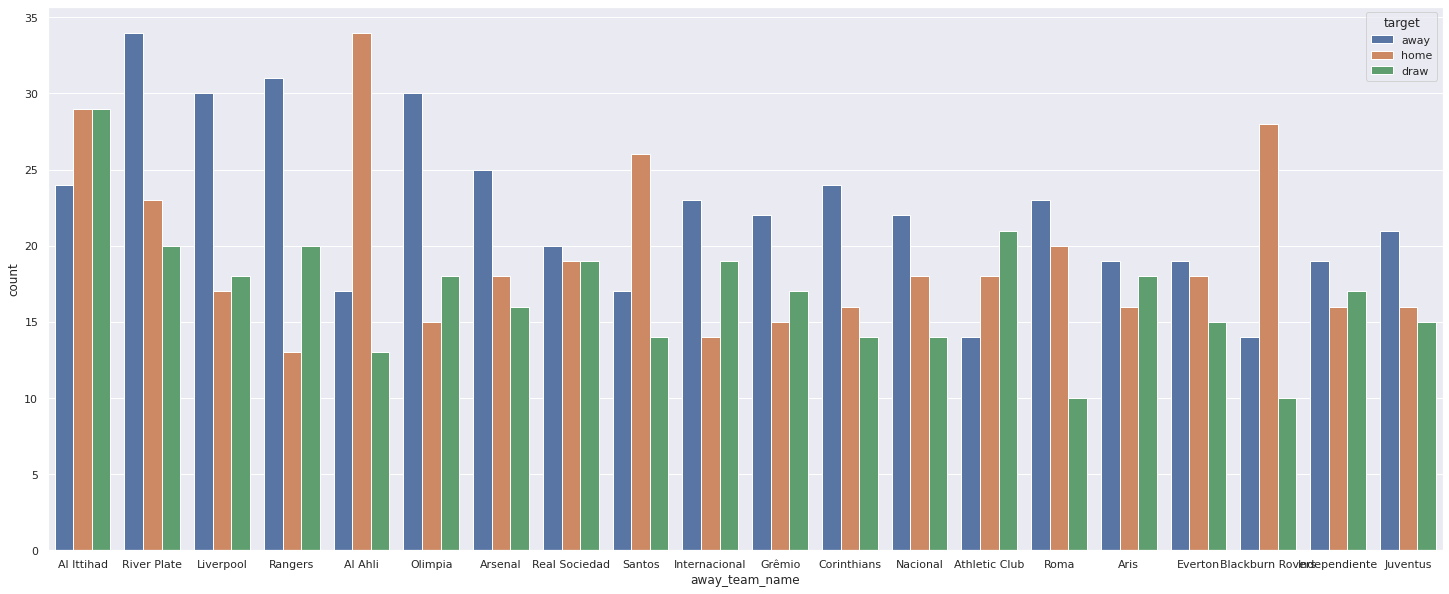

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(x="away_team_name",hue="target",data=train,order=train.away_team_name.value_counts().iloc[:20].index)